# Reproduction of results in "Do Wide and Deep Networks Learn the Same Things?"

In [24]:
import torch 
from torch_cka import CKA
from torchvision.datasets import CIFAR10 
from torchvision import transforms 
from torch.utils.data import DataLoader 

In [47]:
model = torch.hub.load("chenyaofo/pytorch-cifar-models", "cifar10_resnet20", pretrained=True)

Using cache found in /home/kacperwyrwal/.cache/torch/hub/chenyaofo_pytorch-cifar-models_master


In [48]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))

])
dataset = CIFAR10(train=False, root='./data', download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=100, shuffle=False)

Files already downloaded and verified


In [49]:
model_layers = None 

/home/kacperwyrwal/miniconda3/envs/honours_project/lib/python3.10/site-packages/torch_cka/cka.py:51: UserWarning: Both model have identical names - ResNet20. It may cause confusion when interpreting the results. Consider giving unique names to the models :)
  warn(f"Both model have identical names - {self.model2_info['Name']}. " \
| Comparing features |: 100%|██████████| 100/100 [08:03<00:00,  4.84s/it]


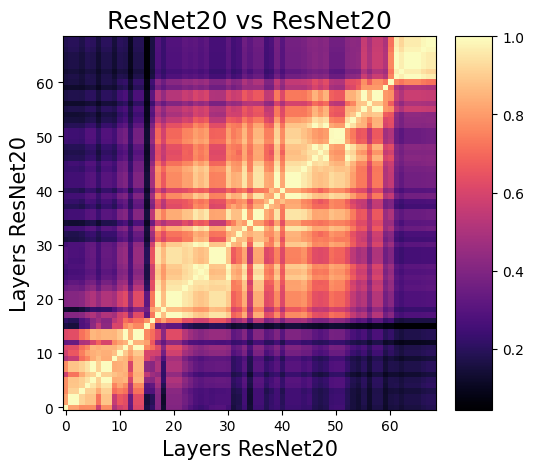

In [50]:
def run_cka(
    model: torch.nn.Module, 
    dataloader: DataLoader, 
    model_name: str | None = None, 
    model_layers: list[str] | None = None, 
    device: str = 'cpu'
) -> CKA: 
    """
    Runs CKA for every pair of layers in the model and plots the results as a heatmap. 
    """
    if model_name is None: 
        model_name = model.__class__.__name__
    cka = CKA(
        model1=model, 
        model2=model,
        model1_name=model_name,
        model2_name=model_name,   
        model1_layers=model_layers,
        model2_layers=model_layers,
        device=device,
    )
    cka.compare(dataloader1=dataloader, dataloader2=dataloader)
    cka.plot_results()
    return cka


cka = run_cka(model, dataloader, model_name="ResNet20")

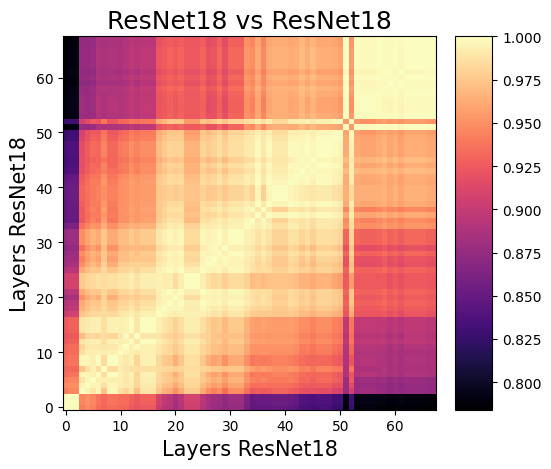

In [37]:
cka.plot_results()